# Importing Dataset

In [1]:
from pathlib import Path

BASE_DIR = Path.cwd()
data_path = BASE_DIR / "data" / "cluster_dataset.csv"

In [ ]:
import pandas as pd

data=pd.read_csv(data_path, index_col=0)
print(data)

# RHB Clustering

In [6]:
data_rhb = data[data['stand']=='R']
print(data_rhb)

              Name_FG            Name_SC   key_FG   key_MLB   Tm stand  \
252        Jose Abreu        Abreu, José  15676.0  547989.0  HOU     R   
253  Ronald Acuna Jr.  Acuña Jr., Ronald  18401.0  660670.0  ATL     R   
254   Luisangel Acuna   Acuña, Luisangel  26548.0  682668.0  NYM     R   
255      Willy Adames      Adames, Willy  15986.0  642715.0  MIL     R   
256      Jordyn Adams      Adams, Jordyn  23788.0  677941.0  LAA     R   
..                ...                ...      ...       ...  ...   ...   
616        Juan Yepez        Yepez, Juan  18400.0  660766.0  WSN     R   
617        Nick Yorke        Yorke, Nick  27504.0  694377.0  PIT     R   
618       Jacob Young       Young, Jacob  29931.0  696285.0  WSN     R   
619       Seby Zavala       Zavala, Seby  18887.0  664874.0  SEA     R   
620   Travis d'Arnaud   d'Arnaud, Travis   7739.0  518595.0  ATL     R   

     mean_batspeed  std_batspeed  mean_swinglength  std_swinglength  ...  \
252      71.720968      7.114270   

In [7]:
# Importing required libraries and defining cluster sets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

cluster_set = ['attack_angle', 'mean_batspeed', 'mean_swinglength', 'z_swing_percent', 'oz_swing_percent',
               'z_swing_pct/oz_swing_pct', 'swing_percent']

data_cluster = data_rhb[cluster_set]

# Scaling data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_cluster)

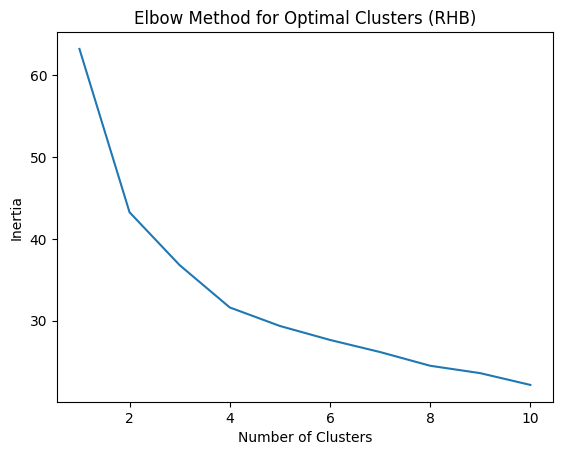

In [8]:
# Apply the Elbow Method
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters (RHB)')
plt.show()

In [9]:
# Clustering process
kmeans = KMeans(n_clusters=4, random_state=42)
data_cluster['batter_cluster'] = kmeans.fit_predict(data_scaled)
data_rhb['batter_cluster'] = data_cluster['batter_cluster']
print(data_rhb[['Name_FG', 'batter_cluster']].head())

              Name_FG  batter_cluster
252        Jose Abreu               1
253  Ronald Acuna Jr.               3
254   Luisangel Acuna               2
255      Willy Adames               3
256      Jordyn Adams               2


/var/folders/hv/y2yg6cw53bx_m5g2sh5sfc2w0000gp/T/ipykernel_4415/612860622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['batter_cluster'] = kmeans.fit_predict(data_scaled)
/var/folders/hv/y2yg6cw53bx_m5g2sh5sfc2w0000gp/T/ipykernel_4415/612860622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rhb['batter_cluster'] = data_cluster['batter_cluster']


In [10]:
# Print luster counts
cluster_counts = data_cluster['batter_cluster'].value_counts()
print(cluster_counts)

batter_cluster
3    107
1    106
2     89
0     67
Name: count, dtype: int64


In [11]:
# Average stats of cluster sets
cluster_avg = data_cluster.groupby('batter_cluster').mean()
cluster_avg

,attack_angle,mean_batspeed,mean_swinglength,z_swing_percent,oz_swing_percent,z_swing_pct/oz_swing_pct,swing_percent
batter_cluster,,,,,,,
0,13.357741,69.463702,6.972690,61.976119,20.926866,3.020786,41.923881
1,11.414070,69.169096,7.000429,65.670755,30.590566,2.172193,48.289623
2,13.236988,71.301022,7.298016,73.976404,37.419101,2.002427,55.334831
3,15.713389,72.900948,7.514278,68.567290,27.555140,2.522420,47.899065


In [12]:
# Renaming clusters for RHB
data_rhb['batter_cluster'] = data_rhb['batter_cluster'].replace({0: 1, 1: 2, 2: 3, 3: 4})
print(data_rhb[['Name_FG', 'batter_cluster']].head())

              Name_FG  batter_cluster
252        Jose Abreu               2
253  Ronald Acuna Jr.               4
254   Luisangel Acuna               3
255      Willy Adames               4
256      Jordyn Adams               3


/var/folders/hv/y2yg6cw53bx_m5g2sh5sfc2w0000gp/T/ipykernel_4415/3985684597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rhb['batter_cluster'] = data_rhb['batter_cluster'].replace({0: 1, 1: 2, 2: 3, 3: 4})


In [13]:
# Standard Stats
data_rhb[['PA', 'AB', 'AVG', 'OBP', 'SLG', 'OPS','batter_cluster']].groupby('batter_cluster').mean()

,PA,AB,AVG,OBP,SLG,OPS
batter_cluster,,,,,,
1,277.522388,243.373134,0.224621,0.311756,0.346212,0.657968
2,240.113208,218.622642,0.228474,0.286190,0.340230,0.626420
3,269.258427,249.943820,0.233241,0.276265,0.368807,0.645072
4,338.635514,302.214953,0.233912,0.307277,0.403937,0.711214


In [14]:
# Advanced Stats
data_rhb[['ISO', 'BABIP', 'wRC', 'wRAA', 'wOBA', 'wRC+','batter_cluster']].groupby('batter_cluster').mean()

,ISO,BABIP,wRC,wRAA,wOBA,wRC+
batter_cluster,,,,,,
1,0.121591,0.278195,32.119372,-0.344661,0.293374,88.889379
2,0.111755,0.281118,24.618013,-3.469967,0.276290,76.775183
3,0.135567,0.285639,28.923375,-2.573956,0.280470,78.967921
4,0.170025,0.286062,43.186403,3.573474,0.310012,99.822627


In [15]:
# Batted Ball Stats
data_rhb[['GB%', 'FB%', 'GB/FB', 'HR/FB', 'BABIP', 'LD%',
         'Oppo%', 'Cent%', 'Pull%', 'Soft%', 'Med%', 'Hard%', 'batter_cluster']].groupby('batter_cluster').mean()

,GB%,FB%,GB/FB,HR/FB,BABIP,LD%,Oppo%,Cent%,Pull%,Soft%,Med%,Hard%
batter_cluster,,,,,,,,,,,,
1,0.425030,0.378794,1.230484,0.084640,0.278195,0.196177,0.249555,0.351951,0.398494,0.160618,0.547704,0.291678
2,0.458289,0.345677,1.456121,0.074783,0.281118,0.196034,0.249081,0.368936,0.381983,0.166647,0.562237,0.271116
3,0.428422,0.375995,1.282825,0.098735,0.285639,0.195583,0.248407,0.350434,0.401159,0.171268,0.526320,0.302412
4,0.416884,0.401610,1.150337,0.133590,0.286062,0.181506,0.233013,0.339887,0.427100,0.160789,0.497794,0.341418


In [16]:
# Plate Discipline Stats - Standard
data_rhb[['BB%', 'K%', 'BB/K', 'f_strike_percent', 'batter_cluster']].groupby('batter_cluster').mean()

,BB%,K%,BB/K,f_strike_percent
batter_cluster,,,,
1,0.102915,0.232429,0.484948,61.968657
2,0.063867,0.223868,0.321118,64.028302
3,0.048195,0.244219,0.216938,66.823596
4,0.085269,0.256564,0.356493,62.700935


In [17]:
# Plate Discipline Stats - Swing Decision
data_rhb[['z_swing_percent', 'oz_swing_percent', 'meatball_swing_percent', 'swing_percent',
       'z_swing_pct/oz_swing_pct', 'batter_cluster']].groupby('batter_cluster').mean()

,z_swing_percent,oz_swing_percent,meatball_swing_percent,swing_percent,z_swing_pct/oz_swing_pct
batter_cluster,,,,,
1,61.976119,20.926866,74.849254,41.923881,3.020786
2,65.670755,30.590566,74.928302,48.289623,2.172193
3,73.976404,37.419101,81.423596,55.334831,2.002427
4,68.567290,27.555140,78.604673,47.899065,2.522420


In [18]:
# Plate Discipline Stats - Contact
data_rhb[['iz_contact_percent', 'z_swing_miss_percent', 'oz_contact_percent', 'oz_swing_miss_percent',
          'whiff_percent', 'batter_cluster']].groupby('batter_cluster').mean()

,iz_contact_percent,z_swing_miss_percent,oz_contact_percent,oz_swing_miss_percent,whiff_percent
batter_cluster,,,,,
1,82.637313,16.746269,56.276119,43.107463,23.140299
2,84.068868,15.404717,57.474528,42.016038,23.750000
3,80.424719,19.139326,53.221348,46.288764,28.556180
4,79.675701,20.065421,50.733645,49.021495,28.500000


In [19]:
# TOP 10 players in cluster 1 (by AB)
cluster_1_players = data_rhb[data_rhb['batter_cluster'] == 1]

top_10_ab = cluster_1_players.sort_values(by='AB', ascending=False).head(10)

top_10_ab

,Name_FG,Name_SC,key_FG,key_MLB,Tm,stand,mean_batspeed,std_batspeed,mean_swinglength,std_swinglength,...,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,f_strike_percent,z_swing_pct/oz_swing_pct,batter_cluster
576,Gleyber Torres,"Torres, Gleyber",16997.0,650402.0,NYY,R,69.523529,5.689158,7.315966,0.538612,...,988.0,50.7,1427.0,42.3,1189.0,22.9,45.7,62.9,3.233645,1
602,Taylor Ward,"Ward, Taylor",17548.0,621493.0,LAA,R,70.189433,5.026238,7.055670,0.547717,...,858.0,51.0,1325.0,42.2,1097.0,25.5,43.2,61.1,3.115385,1
295,Alex Bregman,"Bregman, Alex",17678.0,608324.0,HOU,R,71.227331,4.213767,6.894915,0.585761,...,796.0,50.7,1213.0,42.2,1010.0,12.8,44.9,63.6,2.779661,1
363,Maikel Garcia,"Garcia, Maikel",22715.0,672580.0,KCR,R,70.537773,6.075242,7.187118,0.733884,...,786.0,52.3,1235.0,41.1,970.0,15.7,43.4,65.7,3.000000,1
275,Randy Arozarena,"Arozarena, Randy",19290.0,668227.0,2 Tms,R,72.430303,6.361093,7.316253,0.631000,...,781.0,47.3,1312.0,43.0,1192.0,29.7,41.0,62.5,2.448560,1
403,Jonathan India,"India, Jonathan",21523.0,663697.0,CIN,R,70.931215,6.974702,7.119337,0.581393,...,777.0,50.9,1350.0,42.8,1136.0,19.2,38.3,59.8,3.130435,1
593,Matt Vierling,"Vierling, Matt",21558.0,663837.0,DET,R,70.898980,5.063808,7.436735,0.656136,...,741.0,51.9,1193.0,42.1,967.0,19.5,42.8,57.8,2.822727,1
561,Seiya Suzuki,"Suzuki, Seiya",30116.0,673548.0,CHC,R,73.509581,4.751984,7.175749,0.539195,...,727.0,48.6,1220.0,42.3,1062.0,24.5,39.6,57.5,2.879227,1
424,Wyatt Langford,"Langford, Wyatt",33333.0,694671.0,TEX,R,73.727824,5.475321,6.825069,0.704410,...,696.0,48.0,1083.0,42.1,949.0,22.9,42.8,60.7,2.795652,1
571,Lane Thomas,"Thomas, Lane",16939.0,657041.0,2 Tms,R,71.673219,4.069471,6.655840,0.616222,...,675.0,50.7,1054.0,44.0,916.0,23.3,43.8,62.6,2.794760,1


In [20]:
# TOP 10 players in cluster 2 (by AB)
cluster_2_players = data_rhb[data_rhb['batter_cluster'] == 2]

top_10_ab = cluster_2_players.sort_values(by='AB', ascending=False).head(10)

top_10_ab

,Name_FG,Name_SC,key_FG,key_MLB,Tm,stand,mean_batspeed,std_batspeed,mean_swinglength,std_swinglength,...,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,f_strike_percent,z_swing_pct/oz_swing_pct,batter_cluster
596,Anthony Volpe,"Volpe, Anthony",27647.0,683011.0,NYY,R,69.363958,5.208041,7.177292,0.661880,...,952.0,52.0,1455.0,43.5,1216.0,22.6,48.1,61.3,2.232082,2
612,Masyn Winn,"Winn, Masyn",27479.0,691026.0,STL,R,69.754911,6.909920,7.200000,0.826870,...,825.0,51.5,1316.0,42.3,1081.0,19.0,47.0,62.1,2.062500,2
399,Nico Hoerner,"Hoerner, Nico",21479.0,663538.0,CHC,R,67.909592,4.816159,7.023469,0.728418,...,763.0,51.7,1197.0,43.6,1009.0,11.9,48.4,64.9,2.003145,2
590,Andrew Vaughn,"Vaughn, Andrew",26197.0,683734.0,CHW,R,71.102445,4.056457,7.453790,0.575344,...,757.0,48.6,1135.0,43.2,1010.0,22.0,49.4,64.3,2.021212,2
472,Zach Neto,"Neto, Zach",31347.0,687263.0,LAA,R,69.920166,7.075368,6.863812,0.679938,...,748.0,48.1,1102.0,41.5,949.0,27.1,48.9,62.1,2.169329,2
317,Jackson Chourio,"Chourio, Jackson",28806.0,694192.0,MIL,R,72.571958,7.500989,7.319048,0.747769,...,689.0,49.6,1043.0,41.2,867.0,27.1,48.8,65.0,2.072100,2
378,Lourdes Gurriel Jr.,"Gurriel Jr., Lourdes",19238.0,666971.0,ARI,R,70.428158,4.737463,7.416316,0.608556,...,719.0,49.7,1035.0,41.7,869.0,20.2,51.1,64.3,2.112462,2
522,Brendan Rodgers,"Rodgers, Brendan",17907.0,663898.0,COL,R,70.852351,5.036101,7.002821,0.547974,...,725.0,50.4,1048.0,43.4,903.0,25.9,49.3,66.7,2.378007,2
549,Will Smith,"Smith, Will",19197.0,669257.0,LAD,R,67.978202,5.158919,7.214986,0.590609,...,749.0,49.6,1126.0,43.9,997.0,20.9,46.2,60.9,2.528517,2
618,Jacob Young,"Young, Jacob",29931.0,696285.0,WSN,R,65.606087,13.443015,6.655652,1.293377,...,620.0,52.6,1029.0,43.8,857.0,19.3,44.9,64.7,2.169065,2


In [21]:
# TOP 10 players in cluster 3 (by AB)
cluster_3_players = data_rhb[data_rhb['batter_cluster'] == 3]

top_10_ab = cluster_3_players.sort_values(by='AB', ascending=False).head(10)

top_10_ab

,Name_FG,Name_SC,key_FG,key_MLB,Tm,stand,mean_batspeed,std_batspeed,mean_swinglength,std_swinglength,...,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,f_strike_percent,z_swing_pct/oz_swing_pct,batter_cluster
577,Ezequiel Tovar,"Tovar, Ezequiel",24064.0,678662.0,COL,R,71.516274,6.055460,7.520047,0.694524,...,997.0,48.1,1216.0,40.9,1035.0,33.5,62.3,68.2,1.859410,3
614,Bobby Witt Jr.,"Witt Jr., Bobby",25764.0,677951.0,KCR,R,74.460511,5.438094,7.073281,0.588232,...,891.0,47.4,1232.0,41.3,1073.0,22.3,51.2,62.0,2.252336,3
264,Jose Altuve,"Altuve, Jose",5417.0,514888.0,HOU,R,67.581124,9.408828,7.664719,0.805997,...,762.0,45.3,1111.0,41.1,1008.0,22.1,51.5,64.6,1.839142,3
313,Nick Castellanos,"Castellanos, Nick",11737.0,592206.0,PHI,R,71.745701,4.984733,7.401357,0.713745,...,909.0,49.1,1150.0,42.7,1002.0,30.1,58.0,69.9,2.089947,3
494,Jeremy Pena,"Peña, Jeremy",21636.0,665161.0,HOU,R,72.348696,5.244349,7.383696,0.673830,...,796.0,48.1,1092.0,41.5,943.0,24.9,54.2,67.6,1.975610,3
492,Salvador Perez,"Perez, Salvador",7304.0,521692.0,KCR,R,73.197397,5.396874,7.841866,0.577103,...,771.0,43.4,998.0,40.6,934.0,27.8,57.8,65.7,1.801865,3
335,Yainer Diaz,"Diaz, Yainer",23003.0,673237.0,HOU,R,72.568571,4.499937,7.463077,0.556894,...,764.0,46.2,983.0,40.1,854.0,24.0,58.8,66.9,1.823944,3
329,Bryan De La Cruz,"De La Cruz, Bryan",19600.0,650559.0,2 Tms,R,71.696931,5.045088,7.644501,0.561741,...,879.0,48.7,1167.0,40.7,975.0,30.1,53.4,64.6,2.309816,3
364,Adolis Garcia,"García, Adolis",19287.0,666969.0,TEX,R,72.172922,4.487023,7.815550,0.540882,...,849.0,44.8,1134.0,40.9,1036.0,34.3,52.1,64.7,2.229167,3
524,Julio Rodriguez,"Rodríguez, Julio",23697.0,677594.0,SEA,R,75.787071,4.880256,7.725066,0.663707,...,810.0,45.5,1085.0,40.8,974.0,30.9,54.3,61.8,2.002681,3


In [22]:
# TOP 10 players in cluster 4 (by AB)
cluster_4_players = data_rhb[data_rhb['batter_cluster'] == 4]

top_10_ab = cluster_4_players.sort_values(by='AB', ascending=False).head(10)

top_10_ab

,Name_FG,Name_SC,key_FG,key_MLB,Tm,stand,mean_batspeed,std_batspeed,mean_swinglength,std_swinglength,...,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,f_strike_percent,z_swing_pct/oz_swing_pct,batter_cluster
543,Marcus Semien,"Semien, Marcus",12533.0,543760.0,TEX,R,68.435771,5.076364,7.548617,0.488935,...,974.0,48.9,1283.0,43.1,1132.0,20.2,50.0,60.4,3.011905,4
377,Vladimir Guerrero Jr.,"Guerrero Jr., Vladimir",19611.0,665489.0,TOR,R,75.578737,5.435001,7.678526,0.572471,...,888.0,49.9,1295.0,41.2,1068.0,21.5,48.0,61.9,2.494545,4
255,Willy Adames,"Adames, Willy",15986.0,642715.0,MIL,R,73.591294,4.642644,8.119765,0.513988,...,964.0,49.5,1353.0,42.6,1166.0,29.5,49.5,59.9,2.533808,4
263,Pete Alonso,"Alonso, Pete",19251.0,624413.0,NYM,R,75.254884,4.882642,7.220930,0.571163,...,820.0,48.3,1344.0,43.2,1201.0,24.7,42.9,57.5,2.355212,4
484,Marcell Ozuna,"Ozuna, Marcell",10324.0,542303.0,ATL,R,73.234577,5.518278,7.171144,0.669211,...,919.0,44.1,1268.0,40.5,1164.0,31.4,46.8,57.6,2.735849,4
368,Paul Goldschmidt,"Goldschmidt, Paul",9218.0,502671.0,STL,R,72.602457,4.803164,7.736364,0.549298,...,903.0,51.0,1387.0,43.8,1191.0,27.4,47.7,64.0,2.206780,4
320,William Contreras,"Contreras, William",20503.0,661388.0,MIL,R,74.152349,5.672251,7.248098,0.580776,...,910.0,47.9,1281.0,41.6,1114.0,27.8,47.4,60.7,2.773438,4
438,Manny Machado,"Machado, Manny",11493.0,592518.0,SDP,R,75.586755,5.428701,7.755188,0.620377,...,888.0,51.4,1227.0,44.2,1054.0,24.4,51.6,63.3,2.437710,4
392,Teoscar Hernandez,"Hernández, Teoscar",13066.0,606192.0,LAD,R,72.956763,5.281673,7.694686,0.581449,...,951.0,48.8,1273.0,41.5,1084.0,34.0,51.2,64.7,2.602787,4
273,Nolan Arenado,"Arenado, Nolan",9777.0,571448.0,STL,R,70.313883,5.533222,8.175922,0.579960,...,778.0,49.6,1217.0,42.2,1034.0,17.2,46.8,61.6,2.130000,4


In [23]:
# Caculating silhouette_score
from sklearn.metrics import silhouette_score

overall_silhouette_score = silhouette_score(data_scaled, data_cluster['batter_cluster'])

print(f"Overall Silhouette Score: {overall_silhouette_score:.4f}")

Overall Silhouette Score: 0.2102


In [24]:
# Cluster dataset for RHB
data_rhb_clus = data_rhb[['Name_FG', 'Name_SC', 'key_FG','key_MLB', 'Tm', 'batter_cluster']]
data_rhb_clus

,Name_FG,Name_SC,key_FG,key_MLB,Tm,batter_cluster
252,Jose Abreu,"Abreu, José",15676.0,547989.0,HOU,2
253,Ronald Acuna Jr.,"Acuña Jr., Ronald",18401.0,660670.0,ATL,4
254,Luisangel Acuna,"Acuña, Luisangel",26548.0,682668.0,NYM,3
255,Willy Adames,"Adames, Willy",15986.0,642715.0,MIL,4
256,Jordyn Adams,"Adams, Jordyn",23788.0,677941.0,LAA,3
...,...,...,...,...,...,...
616,Juan Yepez,"Yepez, Juan",18400.0,660766.0,WSN,2
617,Nick Yorke,"Yorke, Nick",27504.0,694377.0,PIT,4
618,Jacob Young,"Young, Jacob",29931.0,696285.0,WSN,2
619,Seby Zavala,"Zavala, Seby",18887.0,664874.0,SEA,2


# LHB Clustering

In [25]:
data_lhb = data[data['stand']=='L']
print(data_lhb)

              Name_FG            Name_SC   key_FG   key_MLB   Tm stand  \
0           CJ Abrams         Abrams, CJ  25768.0  682928.0  WSN     L   
1        Wilyer Abreu      Abreu, Wilyer  23772.0  677800.0  BOS     L   
2      Ozzie Albies-L      Albies, Ozzie  16556.0  645277.0  ATL     L   
3      Yordan Alvarez    Alvarez, Yordan  19556.0  670541.0  HOU     L   
4      Adael Amador-L      Amador, Adael  27962.0  691182.0  COL     L   
..                ...                ...      ...       ...  ...   ...   
247      Brett Wisely      Wisely, Brett  27735.0  689172.0  SFG     L   
248        James Wood        Wood, James  29518.0  695578.0  WSN     L   
249  Mike Yastrzemski  Yastrzemski, Mike  14854.0  573262.0  SFG     L   
250  Christian Yelich  Yelich, Christian  11477.0  592885.0  MIL     L   
251  Masataka Yoshida  Yoshida, Masataka  31837.0  807799.0  BOS     L   

     mean_batspeed  std_batspeed  mean_swinglength  std_swinglength  ...  \
0        71.869018      5.844900   

In [26]:
# Importing required libraries and defining cluster sets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

cluster_set = ['attack_angle', 'mean_batspeed', 'mean_swinglength', 'z_swing_percent', 'oz_swing_percent',
               'z_swing_pct/oz_swing_pct', 'swing_percent']

data_cluster = data_lhb[cluster_set]

# Scaling data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_cluster)

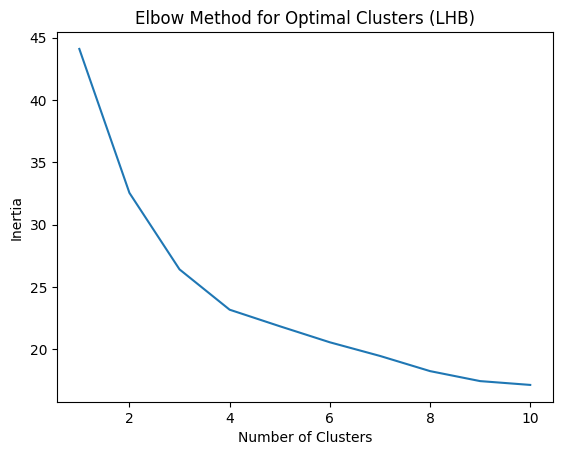

In [27]:
# Apply the elbow method
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters (LHB)')
plt.show()

In [28]:
# Clustering process
kmeans = KMeans(n_clusters=4, random_state=42)
data_cluster['batter_cluster'] = kmeans.fit_predict(data_scaled)
data_lhb['batter_cluster'] = data_cluster['batter_cluster']
print(data_lhb[['Name_FG', 'batter_cluster']].head())

          Name_FG  batter_cluster
0       CJ Abrams               0
1    Wilyer Abreu               1
2  Ozzie Albies-L               0
3  Yordan Alvarez               1
4  Adael Amador-L               0


/var/folders/hv/y2yg6cw53bx_m5g2sh5sfc2w0000gp/T/ipykernel_4415/2853531972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['batter_cluster'] = kmeans.fit_predict(data_scaled)
/var/folders/hv/y2yg6cw53bx_m5g2sh5sfc2w0000gp/T/ipykernel_4415/2853531972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lhb['batter_cluster'] = data_cluster['batter_cluster']


In [29]:
# Print cluster counts
cluster_counts = data_cluster['batter_cluster'].value_counts()
print(cluster_counts)

batter_cluster
1    85
0    70
3    64
2    33
Name: count, dtype: int64


In [30]:
# Average stats of cluster sets
cluster_avg = data_cluster.groupby('batter_cluster').mean()
cluster_avg

,attack_angle,mean_batspeed,mean_swinglength,z_swing_percent,oz_swing_percent,z_swing_pct/oz_swing_pct,swing_percent
batter_cluster,,,,,,,
0,15.923430,71.010880,7.201442,73.241429,33.758571,2.200419,53.272857
1,15.442527,72.270092,7.342689,66.427059,25.541176,2.644418,45.847059
2,18.002788,68.767217,6.953569,59.990909,19.045455,3.198859,39.784848
3,12.367589,67.017910,6.651875,65.945312,27.564062,2.429358,47.145313


In [31]:
# Renaming clusters for RHB
data_lhb['batter_cluster'] = data_lhb['batter_cluster'].replace({0: 5, 1: 6, 2: 7, 3: 8})
print(data_lhb[['Name_FG', 'batter_cluster']].head())

          Name_FG  batter_cluster
0       CJ Abrams               5
1    Wilyer Abreu               6
2  Ozzie Albies-L               5
3  Yordan Alvarez               6
4  Adael Amador-L               5


/var/folders/hv/y2yg6cw53bx_m5g2sh5sfc2w0000gp/T/ipykernel_4415/1045391427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lhb['batter_cluster'] = data_lhb['batter_cluster'].replace({0: 5, 1: 6, 2: 7, 3: 8})


In [32]:
# Standard Stats
data_lhb[['PA', 'AB', 'AVG', 'OBP', 'SLG', 'OPS','batter_cluster']].groupby('batter_cluster').mean()

,PA,AB,AVG,OBP,SLG,OPS
batter_cluster,,,,,,
5,306.014286,278.728571,0.234278,0.289670,0.384313,0.673983
6,369.529412,325.600000,0.236416,0.318358,0.408984,0.727342
7,244.969697,208.696970,0.217923,0.324454,0.346725,0.671179
8,253.265625,227.671875,0.233168,0.297703,0.334235,0.631937


In [33]:
# Advanced Stats
data_lhb[['ISO', 'BABIP', 'wRC', 'wRAA', 'wOBA', 'wRC+','batter_cluster']].groupby('batter_cluster').mean()

,ISO,BABIP,wRC,wRAA,wOBA,wRC+
batter_cluster,,,,,,
5,0.150035,0.285719,36.055235,0.258274,0.292393,88.120826
6,0.172569,0.293550,48.552847,5.326009,0.317250,104.757065
7,0.128802,0.276121,30.905133,2.249051,0.301117,95.121696
8,0.101066,0.284336,26.190072,-3.436452,0.280403,79.421398


In [34]:
# Batted Ball Stats
data_lhb[['GB%', 'FB%', 'GB/FB', 'HR/FB', 'BABIP', 'LD%',
         'Oppo%', 'Cent%', 'Pull%', 'Soft%', 'Med%', 'Hard%', 'batter_cluster']].groupby('batter_cluster').mean()

,GB%,FB%,GB/FB,HR/FB,BABIP,LD%,Oppo%,Cent%,Pull%,Soft%,Med%,Hard%
batter_cluster,,,,,,,,,,,,
5,0.426321,0.383614,1.212993,0.109533,0.285719,0.190065,0.226879,0.339961,0.433160,0.157774,0.538754,0.303472
6,0.413829,0.389272,1.141962,0.140606,0.293550,0.196898,0.239365,0.346806,0.413829,0.154153,0.502151,0.343696
7,0.393785,0.393491,1.081710,0.085883,0.276121,0.212724,0.243140,0.346252,0.410608,0.164365,0.545077,0.290557
8,0.448749,0.341869,1.485390,0.062808,0.284336,0.209382,0.260936,0.359194,0.379871,0.160558,0.589224,0.250218


In [35]:
# Plate Discipline Stats - Standard
data_lhb[['BB%', 'K%', 'BB/K', 'f_strike_percent', 'batter_cluster']].groupby('batter_cluster').mean()

,BB%,K%,BB/K,f_strike_percent
batter_cluster,,,,
5,0.064524,0.238338,0.292705,64.202857
6,0.099916,0.255758,0.418900,59.930588
7,0.128319,0.241462,0.571942,58.806061
8,0.075878,0.209644,0.403748,63.392187


In [36]:
# Plate Discipline Stats - Swing Decision
data_lhb[['z_swing_percent', 'oz_swing_percent', 'meatball_swing_percent', 'swing_percent',
       'z_swing_pct/oz_swing_pct', 'batter_cluster']].groupby('batter_cluster').mean()

,z_swing_percent,oz_swing_percent,meatball_swing_percent,swing_percent,z_swing_pct/oz_swing_pct
batter_cluster,,,,,
5,73.241429,33.758571,82.898571,53.272857,2.200419
6,66.427059,25.541176,76.522353,45.847059,2.644418
7,59.990909,19.045455,76.148485,39.784848,3.198859
8,65.945312,27.564062,76.054688,47.145313,2.429358


In [37]:
# Plate Discipline Stats - Contact
data_lhb[['iz_contact_percent', 'z_swing_miss_percent', 'oz_contact_percent', 'oz_swing_miss_percent',
          'whiff_percent', 'batter_cluster']].groupby('batter_cluster').mean()

,iz_contact_percent,z_swing_miss_percent,oz_contact_percent,oz_swing_miss_percent,whiff_percent
batter_cluster,,,,,
5,81.107143,18.495714,53.608571,45.980000,27.260000
6,80.208235,19.456471,51.918824,47.722353,27.354118
7,81.763636,17.536364,53.612121,46.042424,24.190909
8,84.537500,14.475000,58.681250,40.329687,21.835938


In [38]:
# TOP 10 players in cluster 5 (by AB)
cluster_5_players = data_lhb[data_lhb['batter_cluster'] == 5]

top_10_ab = cluster_5_players.sort_values(by='AB', ascending=False).head(10)

top_10_ab

,Name_FG,Name_SC,key_FG,key_MLB,Tm,stand,mean_batspeed,std_batspeed,mean_swinglength,std_swinglength,...,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,f_strike_percent,z_swing_pct/oz_swing_pct,batter_cluster
82,Andres Gimenez,"Giménez, Andrés",19950.0,665926.0,CLE,L,67.453691,6.105649,6.850112,0.634115,...,915.0,51.1,1226.0,44.5,1069.0,22.8,56.4,62.4,1.994652,5
156,Josh Naylor,"Naylor, Josh",18839.0,647304.0,CLE,L,72.554585,5.350440,7.393668,0.669452,...,746.0,45.2,1032.0,42.1,961.0,22.4,50.3,60.3,2.245342,5
146,Jackson Merrill,"Merrill, Jackson",29490.0,701538.0,SDP,L,71.813679,6.133692,7.467925,0.663296,...,874.0,49.3,1092.0,41.9,928.0,20.5,56.9,65.5,2.325581,5
92,Bryce Harper,"Harper, Bryce",11579.0,547180.0,PHI,L,73.341221,5.594908,7.154707,0.704964,...,837.0,43.3,1071.0,39.6,979.0,26.7,52.9,62.6,2.341317,5
29,Alec Burleson,"Burleson, Alec",27615.0,676475.0,STL,L,70.938170,5.007216,7.425670,0.579274,...,809.0,49.4,1043.0,41.7,881.0,19.2,55.7,63.5,2.249275,5
0,CJ Abrams,"Abrams, CJ",25768.0,682928.0,WSN,L,71.869018,5.844900,7.404786,0.603652,...,811.0,50.9,1151.0,43.8,990.0,24.7,53.3,63.0,1.991525,5
63,Rafael Devers,"Devers, Rafael",17350.0,646240.0,BOS,L,72.985044,5.068441,7.592962,0.535348,...,829.0,47.3,1124.0,42.7,1015.0,30.9,50.9,60.7,2.427632,5
16,Cody Bellinger,"Bellinger, Cody",15998.0,641355.0,CHC,L,68.392857,5.071214,7.539655,0.588473,...,701.0,50.1,1044.0,43.2,899.0,22.2,49.8,59.1,2.070988,5
81,Luis Garcia Jr.,"García, Luis",20391.0,671277.0,WSN,L,71.134565,6.488924,7.171240,0.597739,...,620.0,47.7,899.0,42.6,802.0,21.3,51.7,65.3,1.916667,5
218,Jesus Sanchez,"Sánchez, Jesús",19913.0,660821.0,MIA,L,74.644127,6.888677,7.057778,0.623756,...,670.0,45.8,911.0,42.8,853.0,31.2,53.2,67.0,2.036011,5


In [39]:
# TOP 10 players in cluster 6 (by AB)
cluster_6_players = data_lhb[data_lhb['batter_cluster'] == 6]

top_10_ab = cluster_6_players.sort_values(by='AB', ascending=False).head(10)

top_10_ab

,Name_FG,Name_SC,key_FG,key_MLB,Tm,stand,mean_batspeed,std_batspeed,mean_swinglength,std_swinglength,...,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,f_strike_percent,z_swing_pct/oz_swing_pct,batter_cluster
68,Jarren Duran,"Duran, Jarren",24617.0,680776.0,BOS,L,73.717965,7.172483,7.555195,0.790566,...,976.0,50.3,1432.0,42.7,1215.0,24.8,48.3,58.7,2.427046,6
162,Shohei Ohtani,"Ohtani, Shohei",19755.0,660271.0,LAD,L,75.837895,5.120365,7.684000,0.599329,...,950.0,48.0,1363.0,42.4,1202.0,29.8,47.3,61.0,2.620301,6
95,Gunnar Henderson,"Henderson, Gunnar",26289.0,683002.0,BAL,L,76.343421,4.709887,7.214474,0.619118,...,935.0,48.4,1402.0,43.4,1257.0,24.4,44.2,55.6,2.875000,6
163,Matt Olson,"Olson, Matt",14344.0,621566.0,ATL,L,73.966917,5.700111,7.323308,0.648526,...,1025.0,48.1,1417.0,43.1,1271.0,26.3,49.7,60.3,2.519164,6
42,Corbin Carroll,"Carroll, Corbin",25878.0,682998.0,ARI,L,73.161663,4.998501,6.930023,0.628840,...,747.0,47.2,1249.0,41.2,1092.0,20.3,41.4,56.4,2.401606,6
56,Jake Cronenworth,"Cronenworth, Jake",18036.0,630105.0,SDP,L,69.017026,5.956737,6.979137,0.725876,...,928.0,51.2,1409.0,43.4,1195.0,17.1,45.0,58.2,2.852814,6
197,Kyle Schwarber,"Schwarber, Kyle",16478.0,656941.0,PHI,L,77.617729,4.857007,7.604986,0.471083,...,828.0,47.9,1366.0,41.6,1186.0,32.0,39.9,56.4,2.899522,6
24,JJ Bleday,"Bleday, JJ",26368.0,668709.0,OAK,L,71.313429,4.299207,7.082974,0.575437,...,805.0,47.8,1188.0,44.5,1105.0,26.1,45.3,61.4,2.744939,6
157,Brandon Nimmo,"Nimmo, Brandon",12927.0,607043.0,NYM,L,73.615839,4.671407,7.267612,0.583311,...,899.0,49.9,1371.0,42.9,1179.0,23.4,44.8,59.0,2.721992,6
142,Ryan McMahon,"McMahon, Ryan",15112.0,641857.0,COL,L,72.135143,6.528403,7.210857,0.690788,...,932.0,52.1,1420.0,42.6,1161.0,30.0,46.9,60.7,2.475472,6


In [40]:
# TOP 10 players in cluster 7 (by AB)
cluster_7_players = data_lhb[data_lhb['batter_cluster'] == 7]

top_10_ab = cluster_7_players.sort_values(by='AB', ascending=False).head(10)

top_10_ab

,Name_FG,Name_SC,key_FG,key_MLB,Tm,stand,mean_batspeed,std_batspeed,mean_swinglength,std_swinglength,...,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,f_strike_percent,z_swing_pct/oz_swing_pct,batter_cluster
210,Juan Soto,"Soto, Juan",20123.0,665742.0,NYY,L,75.094130,5.739606,7.254565,0.540557,...,810.0,46.5,1374.0,43.0,1272.0,21.5,37.2,54.1,3.224044,7
195,Nolan Schanuel,"Schanuel, Nolan",33189.0,694384.0,LAA,L,64.530894,5.817054,6.512466,0.642140,...,732.0,50.0,1179.0,42.5,1001.0,14.4,41.8,62.4,2.888372,7
116,Steven Kwan,"Kwan, Steven",24610.0,680757.0,CLE,L,64.137852,6.743700,6.382353,0.696821,...,645.0,51.7,1119.0,43.4,939.0,8.2,39.1,58.9,3.000000,7
246,Jesse Winker,"Winker, Jesse",13590.0,608385.0,2 Tms,L,69.002188,6.552381,7.242812,0.654724,...,707.0,53.0,1093.0,43.7,902.0,19.6,43.2,61.9,3.405263,7
185,Josh Rojas,"Rojas, Josh",19734.0,668942.0,SEA,L,66.272069,4.524636,7.212759,0.607971,...,667.0,52.4,997.0,46.1,877.0,24.4,45.6,63.6,3.040909,7
55,J.P. Crawford,"Crawford, J.P.",15491.0,641487.0,SEA,L,71.410943,5.132295,7.181132,0.698173,...,621.0,52.4,1002.0,44.8,856.0,20.2,41.1,60.3,3.406593,7
204,Jon Singleton,"Singleton, Jon",10441.0,572138.0,HOU,L,71.338655,6.228316,6.743277,0.735376,...,472.0,48.5,788.0,44.7,727.0,30.1,40.7,56.5,2.650442,7
159,Lars Nootbaar,"Nootbaar, Lars",21454.0,663457.0,STL,L,72.091016,4.787414,6.704297,0.607487,...,480.0,51.2,850.0,42.4,703.0,19.0,37.2,56.4,3.343195,7
236,LaMonte Wade Jr.,"Wade Jr., LaMonte",18126.0,664774.0,SFG,L,72.376754,4.115837,6.672807,0.621464,...,499.0,48.4,793.0,42.6,699.0,24.2,40.9,54.2,3.113861,7
228,Kyle Tucker,"Tucker, Kyle",18345.0,663656.0,HOU,L,72.203398,5.413969,7.430583,0.622181,...,442.0,48.4,653.0,41.7,563.0,19.0,41.8,55.0,3.868571,7


In [41]:
# TOP 10 players in cluster 8 (by AB)
cluster_8_players = data_lhb[data_lhb['batter_cluster'] == 8]

top_10_ab = cluster_8_players.sort_values(by='AB', ascending=False).head(10)

top_10_ab

,Name_FG,Name_SC,key_FG,key_MLB,Tm,stand,mean_batspeed,std_batspeed,mean_swinglength,std_swinglength,...,in_zone_swing,in_zone_percent,in_zone,edge_percent,edge,whiff_percent,swing_percent,f_strike_percent,z_swing_pct/oz_swing_pct,batter_cluster
6,Luis Arraez,"Arraez, Luis",18568.0,650333.0,2 Tms,L,62.760036,5.327385,5.886076,0.630279,...,795.0,52.2,1262.0,44.2,1067.0,6.9,49.8,61.3,1.784703,8
65,Brendan Donovan,"Donovan, Brendan",24679.0,680977.0,STL,L,69.554043,5.160199,6.793404,0.648649,...,813.0,51.4,1277.0,42.8,1064.0,15.1,44.2,59.7,2.687764,8
233,Alex Verdugo,"Verdugo, Alex",17027.0,657077.0,NYY,L,67.510937,6.841820,6.248884,0.679550,...,767.0,53.4,1251.0,44.7,1048.0,15.5,44.7,62.0,2.403922,8
229,Brice Turang,"Turang, Brice",22186.0,668930.0,MIL,L,66.178000,6.708145,6.107500,0.706322,...,851.0,53.5,1321.0,42.7,1056.0,13.8,47.7,62.6,2.267606,8
76,Freddie Freeman,"Freeman, Freddie",5361.0,518692.0,LAD,L,69.654525,4.733486,6.771744,0.576107,...,896.0,48.2,1215.0,42.9,1082.0,20.2,49.4,60.3,2.770677,8
206,Josh Smith,"Smith, Josh",26396.0,669701.0,TEX,L,68.872704,7.746016,6.534694,0.782429,...,804.0,51.7,1202.0,43.7,1018.0,21.8,47.1,65.0,2.583012,8
110,Colt Keith,"Keith, Colt",27899.0,690993.0,DET,L,71.206923,4.436253,6.587692,0.644097,...,672.0,49.2,989.0,41.8,840.0,23.2,48.6,61.9,2.270903,8
213,Bryson Stott,"Stott, Bryson",26294.0,681082.0,PHI,L,68.296717,4.377961,7.082323,0.530145,...,694.0,50.5,1164.0,43.3,998.0,17.0,44.1,63.2,2.106007,8
17,Andrew Benintendi,"Benintendi, Andrew",17901.0,643217.0,CHW,L,67.576602,5.215475,6.677437,0.568019,...,716.0,51.8,1033.0,43.0,858.0,21.1,48.0,61.0,2.760956,8
77,Sal Frelick,"Frelick, Sal",29622.0,686217.0,MIL,L,64.986364,8.308576,6.761230,0.906379,...,589.0,50.5,1033.0,42.2,864.0,12.9,41.5,61.1,2.209302,8


In [42]:
# Caculating silhouette_score
from sklearn.metrics import silhouette_score

overall_silhouette_score = silhouette_score(data_scaled, data_cluster['batter_cluster'])

print(f"Overall Silhouette Score: {overall_silhouette_score:.4f}")

Overall Silhouette Score: 0.2109


In [43]:
# Cluster dataset for LHB
data_lhb_clus = data_lhb[['Name_FG', 'Name_SC', 'key_FG','key_MLB', 'Tm', 'batter_cluster']]
data_lhb_clus

,Name_FG,Name_SC,key_FG,key_MLB,Tm,batter_cluster
0,CJ Abrams,"Abrams, CJ",25768.0,682928.0,WSN,5
1,Wilyer Abreu,"Abreu, Wilyer",23772.0,677800.0,BOS,6
2,Ozzie Albies-L,"Albies, Ozzie",16556.0,645277.0,ATL,5
3,Yordan Alvarez,"Alvarez, Yordan",19556.0,670541.0,HOU,6
4,Adael Amador-L,"Amador, Adael",27962.0,691182.0,COL,5
...,...,...,...,...,...,...
247,Brett Wisely,"Wisely, Brett",27735.0,689172.0,SFG,8
248,James Wood,"Wood, James",29518.0,695578.0,WSN,6
249,Mike Yastrzemski,"Yastrzemski, Mike",14854.0,573262.0,SFG,6
250,Christian Yelich,"Yelich, Christian",11477.0,592885.0,MIL,6


In [44]:
# Select only numerical columns from the 'data_rhb' DataFrame
mean_data_rhb = data_rhb.select_dtypes(include='number').drop(columns=['key_FG', 'key_MLB']).groupby('batter_cluster').mean()

# Print the resulting DataFrame with the mean values for each cluster
print(mean_data_rhb)

                mean_batspeed  std_batspeed  mean_swinglength  \
batter_cluster                                                  
1                   69.463702      5.977448          6.972690   
2                   69.169096      6.200749          7.000429   
3                   71.301022      5.979405          7.298016   
4                   72.900948      5.142950          7.514278   

                std_swinglength  attack_angle          G          PA  \
batter_cluster                                                         
1                      0.667646     13.357741  78.417910  277.522388   
2                      0.705752     11.414070  71.650943  240.113208   
3                      0.690079     13.236988  74.977528  269.258427   
4                      0.591578     15.713389  90.560748  338.635514   

                        AB          H         1B  ...  in_zone_swing_miss  \
batter_cluster                                    ...                       
1               243.37

In [45]:
# Select only numerical columns from the 'data_lhb' DataFrame
mean_data_lhb = data_lhb.select_dtypes(include='number').drop(columns=['key_FG', 'key_MLB']).groupby('batter_cluster').mean()

# Print the resulting DataFrame with the mean values for each cluster
print(mean_data_lhb)

                mean_batspeed  std_batspeed  mean_swinglength  \
batter_cluster                                                  
5                   71.010880      5.584286          7.201442   
6                   72.270092      5.413371          7.342689   
7                   68.767217      6.501036          6.953569   
8                   67.017910      7.317638          6.651875   

                std_swinglength  attack_angle           G          PA  \
batter_cluster                                                          
5                      0.645491     15.923430   86.742857  306.014286   
6                      0.633683     15.442527  101.258824  369.529412   
7                      0.710267     18.002788   69.757576  244.969697   
8                      0.773804     12.367589   74.187500  253.265625   

                        AB          H         1B  ...  in_zone_swing_miss  \
batter_cluster                                    ...                       
5               

In [46]:
# Concatenate the mean data for right-handed batters (mean_data_rhb) 
# and left-handed batters (mean_data_lhb) along the rows (axis=0)
mean_data = pd.concat([mean_data_rhb, mean_data_lhb], axis=0)

# Print the resulting DataFrame, which combines the average stats for both groups
print(mean_data)

                mean_batspeed  std_batspeed  mean_swinglength  \
batter_cluster                                                  
1                   69.463702      5.977448          6.972690   
2                   69.169096      6.200749          7.000429   
3                   71.301022      5.979405          7.298016   
4                   72.900948      5.142950          7.514278   
5                   71.010880      5.584286          7.201442   
6                   72.270092      5.413371          7.342689   
7                   68.767217      6.501036          6.953569   
8                   67.017910      7.317638          6.651875   

                std_swinglength  attack_angle           G          PA  \
batter_cluster                                                          
1                      0.667646     13.357741   78.417910  277.522388   
2                      0.705752     11.414070   71.650943  240.113208   
3                      0.690079     13.236988   74.977528

In [47]:
# Set output_path for mean_data
output_path = BASE_DIR / "data" / "cluster_stats.csv"

mean_data.to_csv(output_path, index=False)

# Batting Stats + Cluster

In [54]:
# Concatenate the clustered data for right-handed batters (data_rhb_clus), left-handed batters (data_lhb_clus)
batting_stats_clustered = pd.concat([data_rhb, data_lhb], ignore_index=True)
print(batting_stats_clustered)

              Name_FG            Name_SC   key_FG   key_MLB   Tm stand  \
0          Jose Abreu        Abreu, José  15676.0  547989.0  HOU     R   
1    Ronald Acuna Jr.  Acuña Jr., Ronald  18401.0  660670.0  ATL     R   
2     Luisangel Acuna   Acuña, Luisangel  26548.0  682668.0  NYM     R   
3        Willy Adames      Adames, Willy  15986.0  642715.0  MIL     R   
4        Jordyn Adams      Adams, Jordyn  23788.0  677941.0  LAA     R   
..                ...                ...      ...       ...  ...   ...   
616      Brett Wisely      Wisely, Brett  27735.0  689172.0  SFG     L   
617        James Wood        Wood, James  29518.0  695578.0  WSN     L   
618  Mike Yastrzemski  Yastrzemski, Mike  14854.0  573262.0  SFG     L   
619  Christian Yelich  Yelich, Christian  11477.0  592885.0  MIL     L   
620  Masataka Yoshida  Yoshida, Masataka  31837.0  807799.0  BOS     L   

     mean_batspeed  std_batspeed  mean_swinglength  std_swinglength  ...  \
0        71.720968      7.114270   

In [55]:
# Checking columns of batting_stats_clustered
print(batting_stats_clustered.columns)

Index(['Name_FG', 'Name_SC', 'key_FG', 'key_MLB', 'Tm', 'stand',
       'mean_batspeed', 'std_batspeed', 'mean_swinglength', 'std_swinglength',
       'attack_angle', 'G', 'PA', 'AB', 'H', '1B', '2B', '3B', 'HR', 'R',
       'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'AVG',
       'BB%', 'K%', 'BB/K', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP', 'wRC', 'wRAA',
       'wOBA', 'wRC+', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'IFH%',
       'BUH%', 'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%',
       'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent',
       'oz_swing_miss_percent', 'oz_contact_percent', 'out_zone_swing_miss',
       'out_zone_swing', 'out_zone_percent', 'out_zone',
       'meatball_swing_percent', 'meatball_percent', 'pitch_count_offspeed',
       'pitch_count_fastball', 'pitch_count_breaking', 'pitch_count',
       'iz_contact_percent', 'in_zone_swing_miss', 'in_zone_swing',
       'in_zone_percent', 'in_zone', 'edge_percent', 'edge

In [62]:
# Choosing columns for batting_stats_final
batting_stats_final = batting_stats_clustered[['Name_FG',  'Tm', 'mean_batspeed', 'mean_swinglength', 'attack_angle', 'PA', 'AB', 'AVG', 'OBP', 'SLG', 'OPS', 'wOBA', 'wRC+', 'Name_SC','batter_cluster']]
print(batting_stats_final)

              Name_FG   Tm  mean_batspeed  mean_swinglength  attack_angle  \
0          Jose Abreu  HOU      71.720968          7.130645      5.253244   
1    Ronald Acuna Jr.  ATL      76.213793          7.625000     13.396897   
2     Luisangel Acuna  NYM      72.229412          7.232353      4.588206   
3        Willy Adames  MIL      73.591294          8.119765     21.708918   
4        Jordyn Adams  LAA      67.552174          7.539130     17.844049   
..                ...  ...            ...               ...           ...   
616      Brett Wisely  SFG      66.170760          6.585380     11.910555   
617        James Wood  WSN      73.687634          7.321505      6.112626   
618  Mike Yastrzemski  SFG      70.804392          7.546622     17.996184   
619  Christian Yelich  MIL      73.087766          7.379255     12.924383   
620  Masataka Yoshida  BOS      70.972876          7.176471     11.139459   

      PA   AB       AVG       OBP       SLG       OPS      wOBA        wRC+

In [63]:
# Assign the current teams for players labeled as '2 Tms'
print(list(batting_stats_final[batting_stats_final['Tm']=='2 Tms']['Name_FG']))

['Jacob Amaya', 'Randy Arozarena', 'Josh Bell-R', 'Christian Bethancourt', 'Mark Canha', 'Dylan Carlson-R', 'Jonatan Clase-R', 'Garrett Cooper', 'J.D. Davis', 'Bryan De La Cruz', 'Paul DeJong', 'Aledmys Diaz', 'Elias Diaz', 'Ty France', 'Austin Hays', 'Danny Jansen', 'Eloy Jimenez', 'Carson Kelly', 'Buddy Kennedy', 'Isiah Kiner-Falefa', 'Ramon Laureano', 'Whit Merrifield', 'Christopher Morel', 'Tomas Nido', 'Connor Norby', 'Isaac Paredes', 'Kevin Pillar', 'Harold Ramirez', 'Pablo Reyes', 'Emmanuel Rivera', 'Victor Robles', 'Nick Senzel', 'Jorge Soler', 'Lane Thomas', 'Justin Turner', 'Gio Urshela', 'Miguel Vargas', 'Luis Arraez', 'Josh Bell-L', 'Dylan Carlson-L', 'Jazz Chisholm Jr.', 'Jonatan Clase-L', 'Ben Gamel', 'Jason Heyward', 'Kevin Kiermaier', 'Joey Loperfido', 'Eddie Rosario', 'Dominic Smith', 'Kyle Stowers', 'Jose Tena', 'Forrest Wall', 'Jesse Winker']


In [64]:
tms2_mapping = {
    'Jacob Amaya': 'CHW',
    'Randy Arozarena': 'SEA',
    'Josh Bell-R': 'ARI',
    'Christian Bethancourt': 'CHC',
    'Mark Canha': 'SFG',
    'Dylan Carlson-R': 'TBR',
    'Jonatan Clase-R': 'TOR',
    'Garrett Cooper': 'BOS',
    'J.D. Davis': 'NYY',
    'Bryan De La Cruz': 'PIT',
    'Paul DeJong': 'KCR',
    'Aledmys Diaz': 'HOU',
    'Elias Diaz': 'SDP',
    'Ty France': 'CIN',
    'Austin Hays': 'PHI',
    'Danny Jansen': 'BOS',
    'Eloy Jimenez': 'BAL',
    'Carson Kelly': 'TEX',
    'Buddy Kennedy': 'PHI',
    'Isiah Kiner-Falefa': 'PIT',
    'Ramon Laureano': 'ATL',
    'Whit Merrifield': 'ATL',
    'Christopher Morel': 'TBR',
    'Tomas Nido': 'CHC',
    'Connor Norby': 'MIA',
    'Isaac Paredes': 'CHC',
    'Kevin Pillar': 'LAA',
    'Harold Ramirez': 'WSN',
    'Pablo Reyes': 'NYM',
    'Emmanuel Rivera': 'BAL',
    'Victor Robles': 'SEA',
    'Nick Senzel': 'CHW',
    'Jorge Soler': 'ATL',
    'Lane Thomas': 'CLE',
    'Justin Turner': 'SEA',
    'Gio Urshela': 'ATL',
    'Miguel Vargas': 'CHW',
    'Luis Arraez': 'SD',
    'Josh Bell-L': 'ARI',
    'Dylan Carlson-L': 'TBR',
    'Jazz Chisholm Jr.': 'NYY',
    'Jonatan Clase-L': 'TOR',
    'Ben Gamel': 'HOU',
    'Jason Heyward': 'HOU',
    'Kevin Kiermaier': 'LAD',
    'Joey Loperfido': 'TOR',
    'Eddie Rosario': 'ATL',
    'Dominic Smith': 'CIN',
    'Kyle Stowers': 'MIA',
    'Jose Tena': 'WSN',
    'Forrest Wall': 'MIA',
    'Jesse Winker': 'NYM'
    }

batting_stats_final['Tm'] = batting_stats_final.apply(
    lambda row: tms2_mapping.get(row['Name_FG'], row['Tm']) 
    if row['Tm'] == '2 Tms' else row['Tm'], 
    axis=1
)

print(batting_stats_final[batting_stats_final['Tm'] == '2 Tms'])

Empty DataFrame
Columns: [Name_FG, Tm, mean_batspeed, mean_swinglength, attack_angle, PA, AB, AVG, OBP, SLG, OPS, wOBA, wRC+, Name_SC, batter_cluster]
Index: []


/var/folders/hv/y2yg6cw53bx_m5g2sh5sfc2w0000gp/T/ipykernel_4415/3834089536.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_stats_final['Tm'] = batting_stats_final.apply(


In [65]:
# Assign the current teams for players labeled as '3 Tms'
print(list(batting_stats_final[batting_stats_final['Tm']=='3 Tms']['Name_FG']))

['Nick Ahmed', 'Robbie Grossman-R', 'Derek Hill', 'Cristian Pache', 'Tommy Pham', 'Amed Rosario', 'Zack Short', 'Austin Slater', 'Cavan Biggio', 'Robbie Grossman-L', 'Luis Guillorme']


In [66]:
tms3_mapping = {
    'Nick Ahmed': 'SDP',
    'Robbie Grossman-R': 'KCR',
    'Derek Hill': 'MIA',
    'Cristian Pache': 'MIA',
    'Tommy Pham': 'KCR',
    'Amed Rosario': 'CIN',
    'Zack Short': 'ATL',
    'Austin Slater': 'BAL',
    'Cavan Biggio': 'ATL',
    'Robbie Grossman-L': 'KCR',
    'Luis Guillorme': 'ARI'
    }

batting_stats_final['Tm'] = batting_stats_final.apply(
    lambda row: tms3_mapping.get(row['Name_FG'], row['Tm']) 
    if row['Tm'] == '3 Tms' else row['Tm'], 
    axis=1
)

print(batting_stats_final[batting_stats_final['Tm'] == '3 Tms'])


Empty DataFrame
Columns: [Name_FG, Tm, mean_batspeed, mean_swinglength, attack_angle, PA, AB, AVG, OBP, SLG, OPS, wOBA, wRC+, Name_SC, batter_cluster]
Index: []


/var/folders/hv/y2yg6cw53bx_m5g2sh5sfc2w0000gp/T/ipykernel_4415/3842667450.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_stats_final['Tm'] = batting_stats_final.apply(


In [67]:
# Output batting_stats_final.csv
output_path = BASE_DIR / "data" / "batting_stats_final.csv"

batting_stats_final.to_csv(output_path, index=False)